<a href="https://colab.research.google.com/github/ANGEL05122002/Mortalidad/blob/main/Mortalidad_en_M%C3%A9xico_COMPUTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## La mortalidad, la fecundidad y la migraci√≥n son fundamentales para comprender la din√°mica del crecimiento de la poblaci√≥n. La informaci√≥n que generan las EDR incluye la causa b√°sica de las defunciones en M√©xico, as√≠ como las caracter√≠sticas del hecho y de las personas fallecidas. Lo anterior brinda elementos para analizar, dise√±ar, evaluar y dar seguimiento a las pol√≠ticas de salud de la poblaci√≥n.

## Las Estad√≠sticas de Defunciones Registradas (EDR) permiten conocer y comparar el volumen, tendencias y caracter√≠sticas de la mortalidad en los diferentes √°mbitos geogr√°ficos del pa√≠s.

* El INEGI presenta informaci√≥n
proveniente del aprovechamiento de los registros administrativos generados por el Registro Civil, el Servicio
M√©dico Forense (SEMEFO) o sus equivalentes, as√≠ como por las Agencias del Ministerio P√∫blico o sus equivalentes en las entidades federativas.

* Integra tambi√©n informaci√≥n generada por la Secretar√≠a de Salud, que resulta del proceso de confronta entre la Secretar√≠a de Salud y el INEGI, previo a la publicaci√≥n de la informaci√≥n
definitiva.

La base de datos de este hecho vital tiene como objetivo ofrecer microdatos √∫tiles y accesibles a estudiantes,
investigadores, autoridades y p√∫blico en general, para atender las necesidades de informaci√≥n demogr√°fica proveniente de los registros administrativos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el dataset
mortalidad = pd.read_csv('mortalidad.csv')
# Mostrar las primeras filas del dataset
print(mortalidad.head().to_markdown(index=False, numalign="left", stralign="left"))

# Informaci√≥n sobre las columnas del dataset
print(mortalidad.info())

| ent_regis   | mun_regis   | tloc_regis   | loc_regis   | ent_resid   | mun_resid   | tloc_resid   | loc_resid   | ent_ocurr   | mun_ocurr   | tloc_ocurr   | loc_ocurr   | causa_def   | cod_adicio   | lista_mex   | sexo   | ent_nac   | afromex   | conindig   | lengua   | cve_lengua   | nacionalid   | nacesp_cve   | edad   | sem_gest   | gramos   | dia_ocurr   | mes_ocurr   | anio_ocur   | dia_regis   | mes_regis   | anio_regis   | dia_nacim   | mes_nacim   | anio_nacim   | cond_act   | ocupacion   | escolarida   | edo_civil   | tipo_defun   | ocurr_trab   | lugar_ocur   | par_agre   | vio_fami   | asist_medi   | cirugia   | natviole   | necropsia   | usonecrops   | encefalica   | donador   | sitio_ocur   | cond_cert   | derechohab   | embarazo   | rel_emba   | horas   | minutos   | capitulo   | grupo   | lista1   | gr_lismex   | area_ur   | edad_agru   | complicaro   | dia_cert   | mes_cert   | anio_cert   | maternas   | ent_ocules   | mun_ocules   | loc_ocules   | razon_m   | dis_re_

In [ ]:
#Eliminamos cod_adicio y maternas ya que presentan una gran cantidad de NA que interfieren con el An√°lisis
mortalidad = mortalidad.drop(['cod_adicio', 'maternas'], axis=1)
print(mortalidad.head().to_markdown(index=False, numalign="left", stralign="left"))

| ent_regis   | mun_regis   | tloc_regis   | loc_regis   | ent_resid   | mun_resid   | tloc_resid   | loc_resid   | ent_ocurr   | mun_ocurr   | tloc_ocurr   | loc_ocurr   | causa_def   | lista_mex   | sexo   | ent_nac   | afromex   | conindig   | lengua   | cve_lengua   | nacionalid   | nacesp_cve   | edad   | sem_gest   | gramos   | dia_ocurr   | mes_ocurr   | anio_ocur   | dia_regis   | mes_regis   | anio_regis   | dia_nacim   | mes_nacim   | anio_nacim   | cond_act   | ocupacion   | escolarida   | edo_civil   | tipo_defun   | ocurr_trab   | lugar_ocur   | par_agre   | vio_fami   | asist_medi   | cirugia   | natviole   | necropsia   | usonecrops   | encefalica   | donador   | sitio_ocur   | cond_cert   | derechohab   | embarazo   | rel_emba   | horas   | minutos   | capitulo   | grupo   | lista1   | gr_lismex   | area_ur   | edad_agru   | complicaro   | dia_cert   | mes_cert   | anio_cert   | ent_ocules   | mun_ocules   | loc_ocules   | razon_m   | dis_re_oax   |
|:------------|:----

In [ ]:
mortalidad.head(5)

ent_regis  mun_regis  tloc_regis  loc_regis  ent_resid  mun_resid  \
0          1          1          15          1         32         44   
1          1          1          15          1          1          1   
2          1          1          15          1          1          1   
3          1          1          15          1          1          1   
4          1          1          15          1         14         53   

   tloc_resid  loc_resid  ent_ocurr  mun_ocurr  ...  edad_agru  complicaro  \
0           5          1          1          1  ...         19           9   
1          15          1          1          1  ...         20           9   
2          15          1          1          1  ...         18           9   
3          15          1          1          1  ...         23           9   
4           1       7777          1          1  ...         14           8   

  dia_cert mes_cert  anio_cert  ent_ocules  mun_ocules  loc_ocules  razon_m  \
0       18       12       2022          88         888        8888        0   
1       12       12       2022          88         888        8888        0   
2       17       12       2022          88         888        8888        0   
3        1        1       2023          88         888        8888        0   
4       22       12       2022          88         888        8888        0   

   dis_re_oax  
0         999  
1         999  
2         999  
3         999  
4         999  

[5 rows x 72 columns]

# An√°lisis Univariado

Estad√≠sticas descriptivas de 'edad':
count    799869.000000
mean       4026.029610
std         316.509825
min        1001.000000
25%        4053.000000
50%        4069.000000
75%        4082.000000
max        4998.000000
Name: edad, dtype: float64


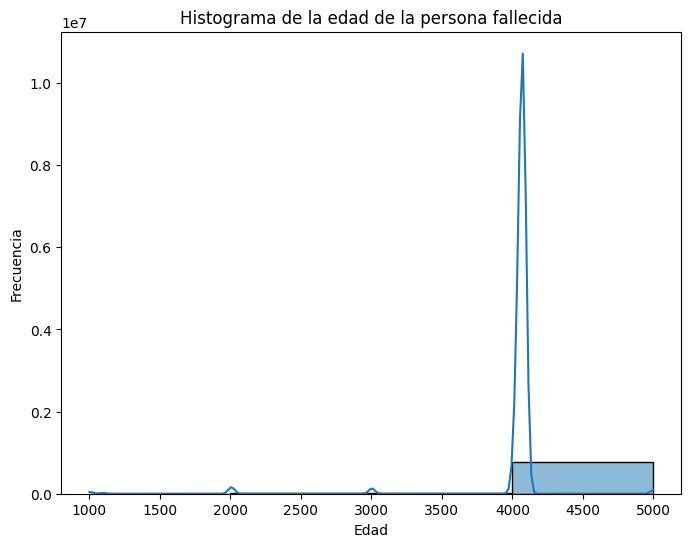

In [ ]:
# An√°lisis univariado de la variable 'edad'
print("Estad√≠sticas descriptivas de 'edad':")
print(mortalidad['edad'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(mortalidad['edad'], bins=4, kde=True)
plt.title('Histograma de la edad de la persona fallecida')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## La variable "edad" en la base de datos no representa edades num√©ricas directamente, sino que usa c√≥digos num√©ricos asociados a diferentes unidades de tiempo (horas, d√≠as, meses, a√±os).

## Esto significa que debemos transformar estos valores en una escala coherente por ejemplo, convertir todo a a√±os.

Estad√≠sticas descriptivas de 'edad' (en a√±os):
count    794321.000000
mean         64.524307
std          22.337086
min           0.000114
25%          53.000000
50%          69.000000
75%          81.000000
max         120.000000
Name: edad_transformada, dtype: float64


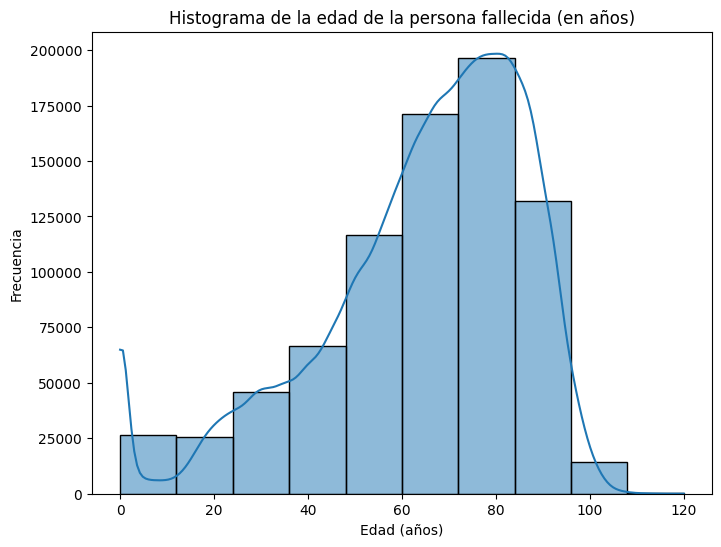

In [ ]:
# Funci√≥n para convertir los valores de edad a a√±os
def convertir_a_anios(valor):
    if 1001 <= valor <= 1023:  # Horas
        return (valor - 1000) / 8760  # Convertir horas a a√±os
    elif 2001 <= valor <= 2029:  # D√≠as
        return (valor - 2000) / 365  # Convertir d√≠as a a√±os
    elif 3001 <= valor <= 3011:  # Meses
        return (valor - 3000) / 12  # Convertir meses a a√±os
    elif 4001 <= valor <= 4120:  # A√±os
        return valor - 4000  # Ya est√° en a√±os
    else:
        return np.nan  # Si no est√° en los rangos, se asigna NaN

# Aplicar la conversi√≥n a la columna "edad"
mortalidad['edad_transformada'] = mortalidad['edad'].apply(convertir_a_anios)

# Mostrar estad√≠sticas descriptivas despu√©s de la transformaci√≥n
print("Estad√≠sticas descriptivas de 'edad' (en a√±os):")
print(mortalidad['edad_transformada'].describe())

# Graficar el histograma
plt.figure(figsize=(8, 6))
sns.histplot(mortalidad['edad_transformada'].dropna(), bins=10, kde=True)
plt.title('Histograma de la edad de la persona fallecida (en a√±os)')
plt.xlabel('Edad (a√±os)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# 1. Estad√≠sticas descriptivas de la edad de las personas fallecidas
# Verificar los valores √∫nicos en la columna 'sexo'
print("Valores √∫nicos en la columna 'sexo':", mortalidad['sexo'].unique())

# Convertir la columna 'sexo' a string si es necesario
mortalidad['sexo'] = mortalidad['sexo'].astype(str)

# Filtrar datos por sexo
hombres = mortalidad[mortalidad['sexo'] == '1']
mujeres = mortalidad[mortalidad['sexo'] == '2']

# Calcular estad√≠sticas descriptivas
estadisticas_generales = mortalidad[['edad_transformada']].describe()
estadisticas_hombres = hombres[['edad_transformada']].describe()
estadisticas_mujeres = mujeres[['edad_transformada']].describe()

# Mostrar estad√≠sticas en formato Markdown para mejor visualizaci√≥n
print("üìå **Estad√≠sticas generales de edad**")
print(estadisticas_generales.to_markdown(numalign="left", stralign="left"))

if not hombres.empty:
    print("\nüßë **Estad√≠sticas de edad para hombres**")
    print(estadisticas_hombres.to_markdown(numalign="left", stralign="left"))

if not mujeres.empty:
    print("\nüë© **Estad√≠sticas de edad para mujeres**")
    print(estadisticas_mujeres.to_markdown(numalign="left", stralign="left"))

Valores √∫nicos en la columna 'sexo': [2 1 9]
üìå **Estad√≠sticas generales de edad**
|       | edad_transformada   |
|:------|:--------------------|
| count | 794321              |
| mean  | 64.5243             |
| std   | 22.3371             |
| min   | 0.000114155         |
| 25%   | 53                  |
| 50%   | 69                  |
| 75%   | 81                  |
| max   | 120                 |

üßë **Estad√≠sticas de edad para hombres**
|       | edad_transformada   |
|:------|:--------------------|
| count | 442484              |
| mean  | 61.1977             |
| std   | 22.4551             |
| min   | 0.000114155         |
| 25%   | 48                  |
| 50%   | 65                  |
| 75%   | 78                  |
| max   | 120                 |

üë© **Estad√≠sticas de edad para mujeres**
|       | edad_transformada   |
|:------|:--------------------|
| count | 351742              |
| mean  | 68.7213             |
| std   | 21.4513             |
| min   | 0.000114155  

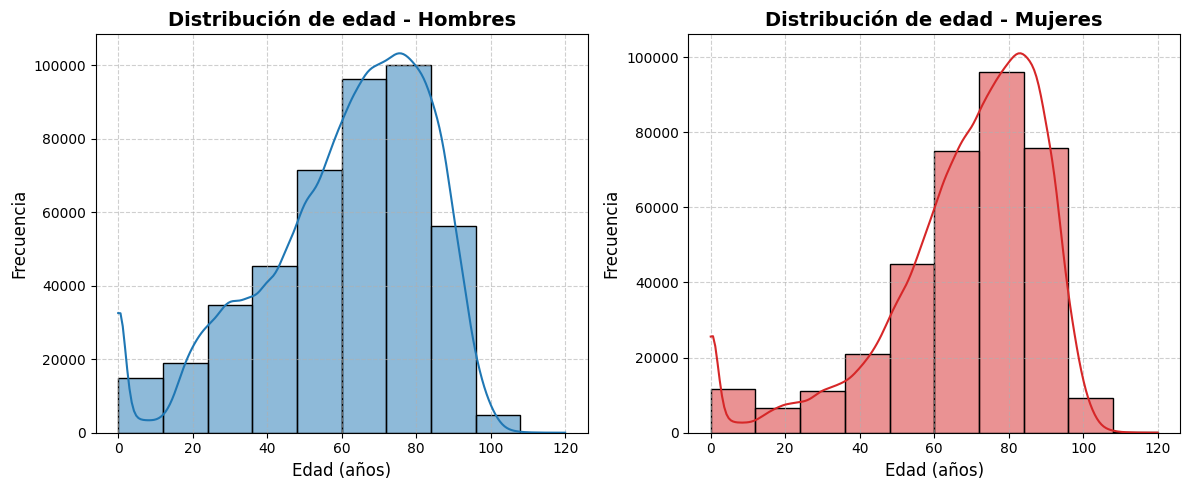

In [ ]:
color_hombres = "#1f77b4"
color_mujeres = "#d62728"

# Histogramas
plt.figure(figsize=(12, 5))

if not hombres.empty:
    plt.subplot(1, 2, 1)
    sns.histplot(hombres['edad_transformada'].dropna(), bins=10, kde=True, color=color_hombres)
    plt.title('Distribuci√≥n de edad - Hombres', fontsize=14, fontweight='bold')
    plt.xlabel('Edad (a√±os)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

if not mujeres.empty:
    plt.subplot(1, 2, 2)
    sns.histplot(mujeres['edad_transformada'].dropna(), bins=10, kde=True, color=color_mujeres)
    plt.title('Distribuci√≥n de edad - Mujeres', fontsize=14, fontweight='bold')
    plt.xlabel('Edad (a√±os)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)


plt.tight_layout()
plt.show()


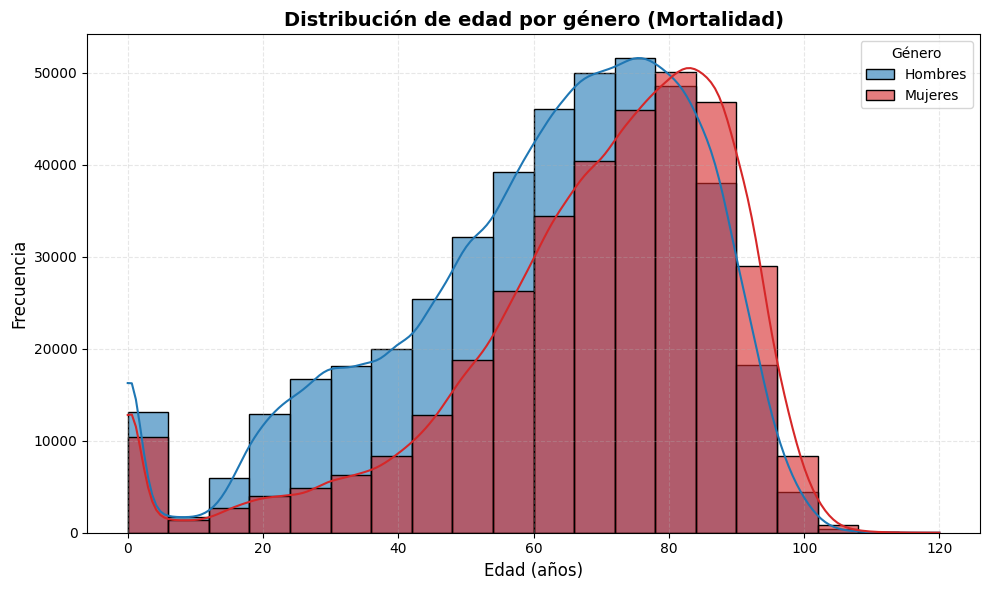

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma para hombres (azul)
sns.histplot(
    hombres['edad_transformada'],  # Ajusta 'edad' seg√∫n tu CSV
    bins=20,
    color="#1f77b4",
    label='Hombres',
    alpha=0.6,
    kde=True,
)

# Histograma para mujeres (rojo)
sns.histplot(
    mujeres['edad_transformada'],  # Ajusta 'edad' seg√∫n tu CSV
    bins=20,
    color="#d62728",
    label='Mujeres',
    alpha=0.6,
    kde=True,
)

plt.title('Distribuci√≥n de edad por g√©nero (Mortalidad)', fontsize=14, fontweight='bold')
plt.xlabel('Edad (a√±os)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='G√©nero')
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

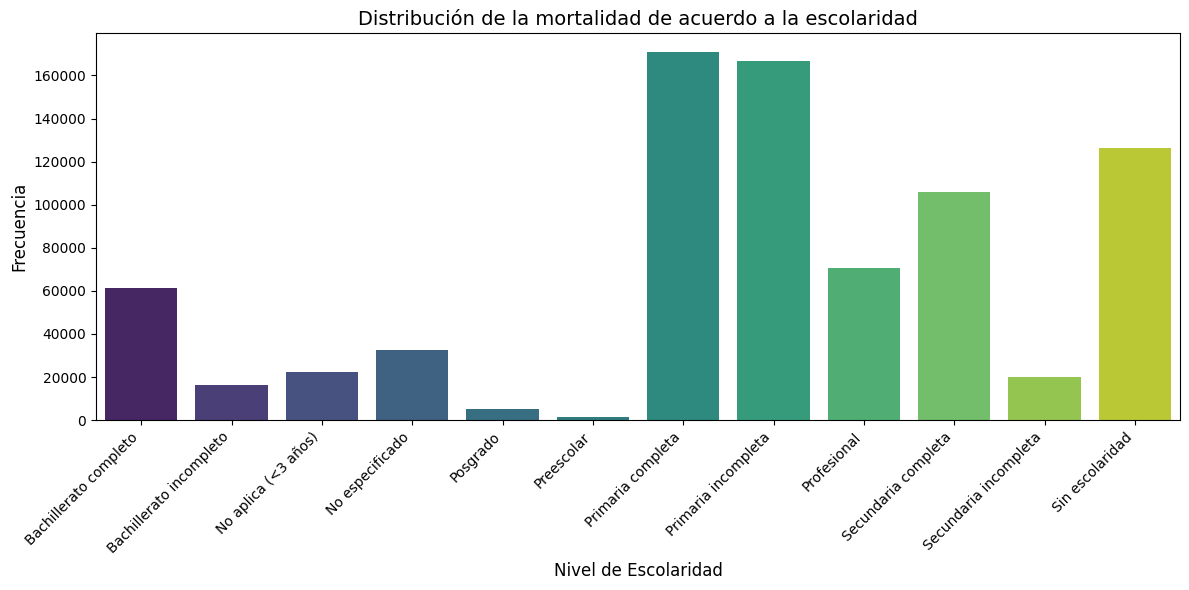

In [ ]:
# Diccionario con los valores y etiquetas de escolaridad
escolaridad_dict = {
    1: "Sin escolaridad", 2: "Preescolar", 3: "Primaria incompleta", 4: "Primaria completa",
    5: "Secundaria incompleta", 6: "Secundaria completa", 7: "Bachillerato incompleto",
    8: "Bachillerato completo", 9: "Profesional", 10: "Posgrado",
    88: "No aplica (<3 a√±os)", 99: "No especificado"
}

# Contar la frecuencia de cada nivel de escolaridad
counts = mortalidad["escolarida"].value_counts().rename(index=escolaridad_dict).sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette="viridis",
    dodge=False,
    legend=False
)

# Etiquetas
plt.xlabel("Nivel de Escolaridad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribuci√≥n de la mortalidad de acuerdo a la escolaridad", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

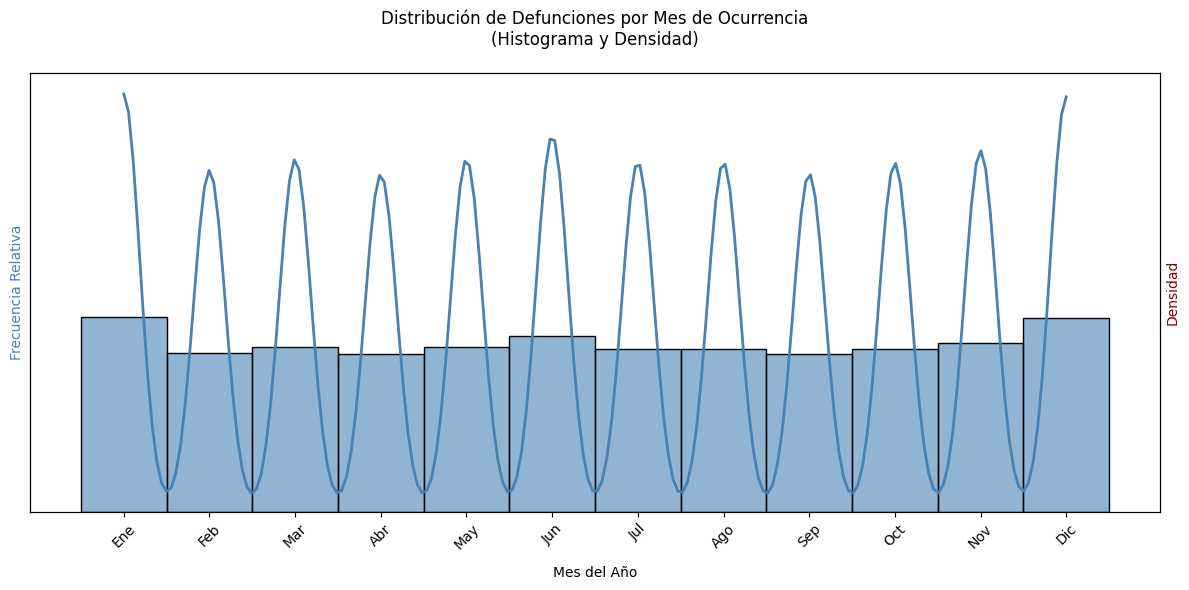

In [ ]:
# Filtrar datos (excluir 99 y valores nulos)
datos_filtrados = mortalidad[(mortalidad['mes_ocurr'] >= 1) &
                            (mortalidad['mes_ocurr'] <= 12)]['mes_ocurr'].dropna()

plt.figure(figsize=(12, 6))

ax = sns.histplot(datos_filtrados, bins=12, kde=True, discrete=True,
                 stat='density', alpha=0.6, color='steelblue',
                 kde_kws={'bw_adjust': 0.8},
                 line_kws={'linewidth': 2, 'color': 'darkred'})

# Ejes
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(1, 13), labels=meses, rotation=45)
plt.yticks([])

# Doble eje Y para mostrar densidad y conteo
ax2 = ax.twinx()
ax2.set_ylabel('Densidad', color='darkred')
ax2.set_yticks([])

# T√≠tulos
plt.title('Distribuci√≥n de Defunciones por Mes de Ocurrencia\n(Histograma y Densidad)', pad=20)
ax.set_xlabel('Mes del A√±o', labelpad=10)
ax.set_ylabel('Frecuencia Relativa', color='steelblue')

ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# An√°lisis Bivariado

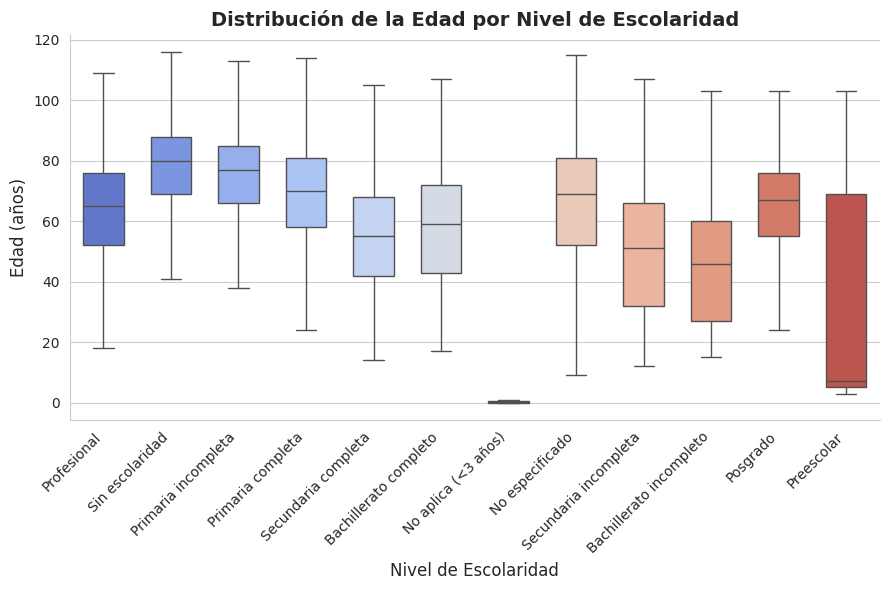

In [ ]:
# Diccionario
mortalidad["escolaridad_label"] = mortalidad["escolarida"].map(escolaridad_dict)

sns.set_style("whitegrid")
plt.figure(figsize=(9, 6))

# Gr√°fico de cajas
sns.boxplot(
    x="escolaridad_label",
    y="edad_transformada",
    data=mortalidad,
    hue="escolaridad_label",
    palette="coolwarm",
    showfliers=False,
    width=0.6,
    dodge=False,
    legend=False
)

plt.title("Distribuci√≥n de la Edad por Nivel de Escolaridad", fontsize=14, fontweight="bold")
plt.xlabel("Nivel de Escolaridad", fontsize=12)
plt.ylabel("Edad (a√±os)", fontsize=12)
plt.xticks(rotation=45, ha="right")

sns.despine()
plt.tight_layout()
plt.show()

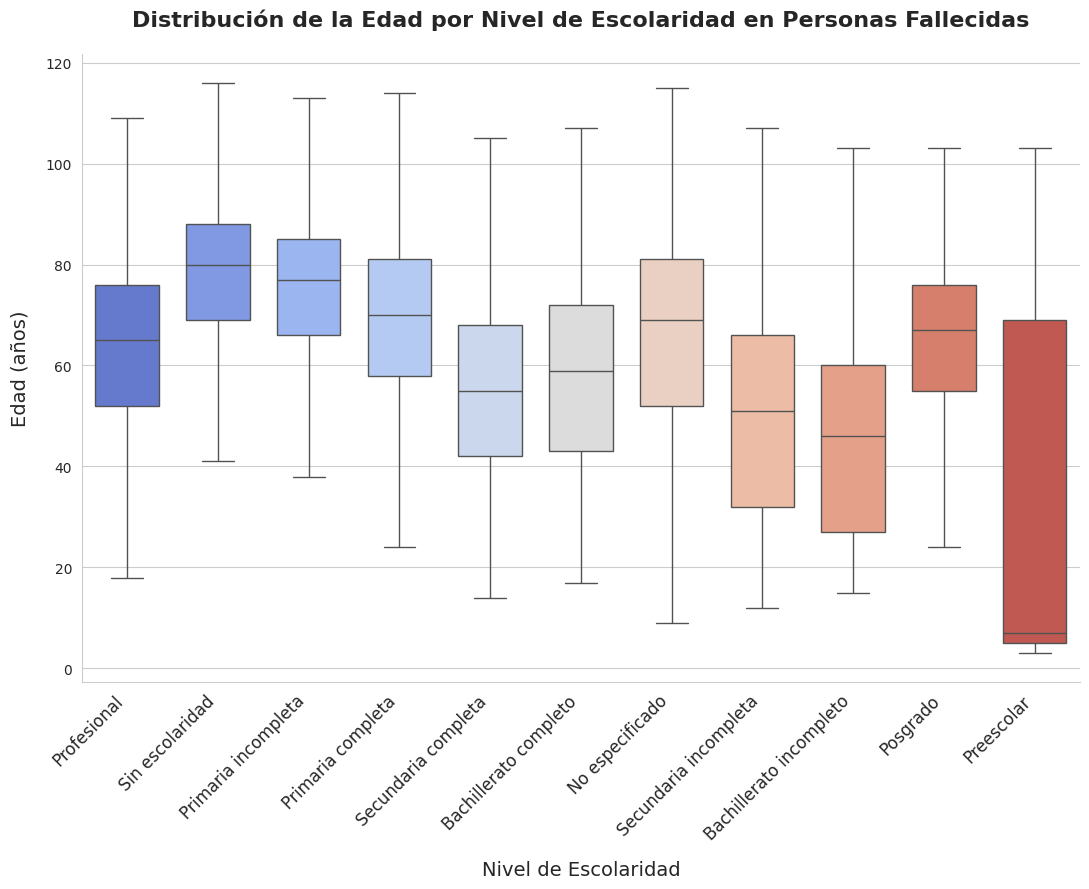

In [ ]:
mortalidad_filtrada = mortalidad[mortalidad["escolarida"] != 88]
mortalidad_filtrada = mortalidad_filtrada.assign(
    escolaridad_label=mortalidad_filtrada["escolarida"].map(escolaridad_dict)
)

sns.set_style("whitegrid")
plt.figure(figsize=(11, 9))


sns.boxplot(
    x="escolaridad_label",
    y="edad_transformada",
    data=mortalidad_filtrada,
    hue="escolaridad_label",
    palette="coolwarm",
    showfliers=False,
    width=0.7,
    dodge=False,
    legend=False
)

# Personalizaci√≥n del gr√°fico
plt.title("Distribuci√≥n de la Edad por Nivel de Escolaridad en Personas Fallecidas",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Nivel de Escolaridad", fontsize=14, labelpad=12)
plt.ylabel("Edad (a√±os)", fontsize=14, labelpad=12)
plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

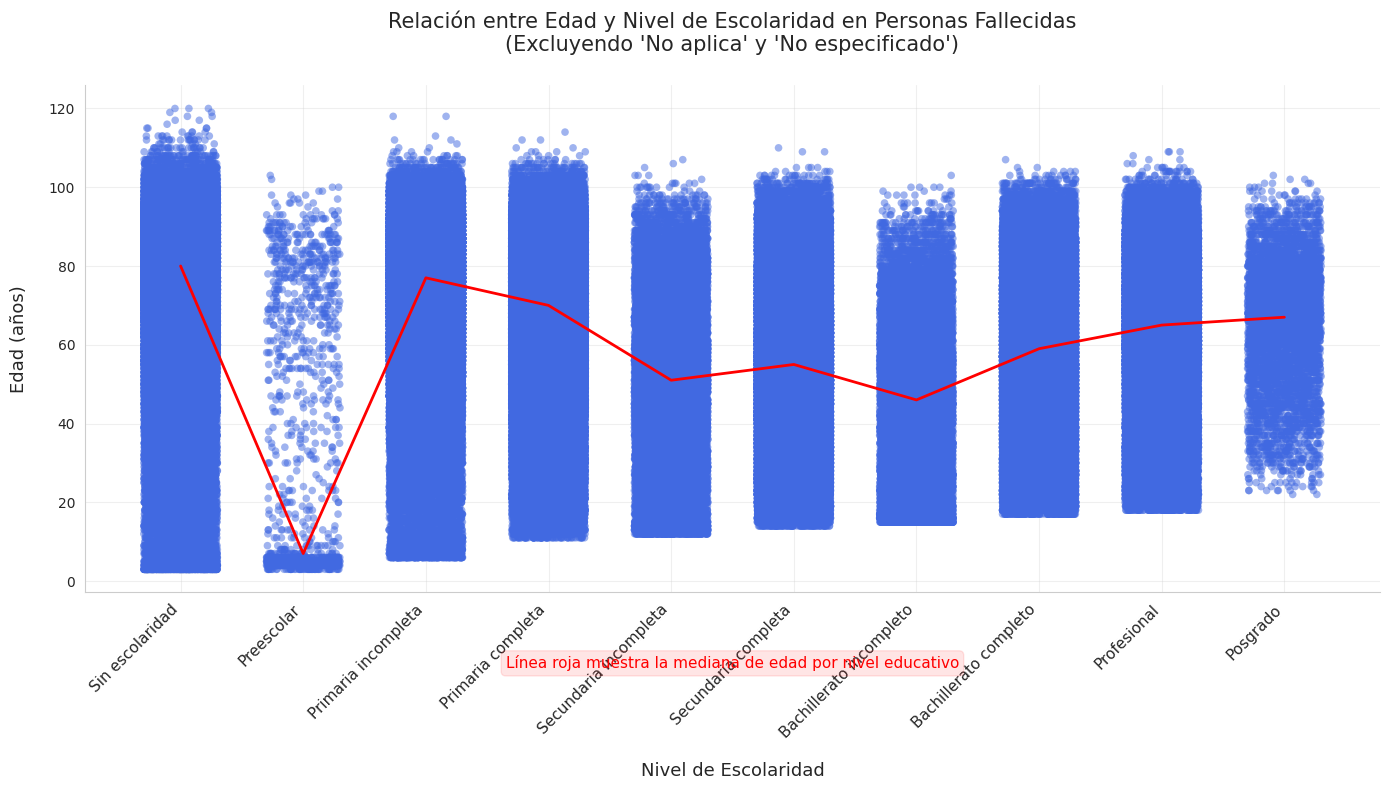

In [ ]:
# Filtrar la base de datos para excluir "No aplica (<3 a√±os)" (88) y "No especificado" (99)
mortalidad_filtrada = mortalidad[~mortalidad["escolarida"].isin([88, 99])].assign(
    escolaridad_label=lambda x: x["escolarida"].map(escolaridad_dict),
    jittered_x=lambda x: x["escolarida"] + np.random.uniform(-0.3, 0.3, size=len(x))
)

sns.set_style("whitegrid")
plt.figure(figsize=(11, 8))  # Tama√±o aumentado para mejor visualizaci√≥n

# Scatter plot
scatter = sns.scatterplot(
    x="jittered_x",
    y="edad_transformada",
    data=mortalidad_filtrada,
    color="royalblue",
    alpha=0.5,
    s=30,
    edgecolor="none"
)

# Etiquetas del eje X
niveles_escolaridad = sorted(mortalidad_filtrada["escolarida"].unique())
plt.xticks(
    ticks=niveles_escolaridad,
    labels=[escolaridad_dict[i] for i in niveles_escolaridad],
    rotation=45,
    ha="right",
    fontsize=11
)

plt.title("Relaci√≥n entre Edad y Nivel de Escolaridad en Personas Fallecidas\n(Excluyendo 'No aplica' y 'No especificado')",
          fontsize=15, pad=25)
plt.xlabel("Nivel de Escolaridad", fontsize=13, labelpad=15)
plt.ylabel("Edad (a√±os)", fontsize=13, labelpad=15)

# L√≠nea de mediana por nivel educativo (sin CI)
sns.lineplot(
    x="escolarida",
    y="edad_transformada",
    data=mortalidad_filtrada,
    color="red",
    errorbar=None,
    estimator=np.median,
    linewidth=2,
    ax=scatter
)

plt.annotate("L√≠nea roja muestra la mediana de edad por nivel educativo",
             xy=(0.5, -0.15),
             xycoords="axes fraction",
             ha="center",
             fontsize=11,
             color="red",
             bbox=dict(boxstyle="round", alpha=0.1, color="red"))

plt.grid(True, alpha=0.3)
plt.tight_layout()
sns.despine()

plt.show()

In [ ]:
# Funci√≥n para calcular Cramer's V
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    tabla_contingencia = pd.crosstab(x, y)  # Tabla de contingencia
    if tabla_contingencia.empty:  # Verificar si hay datos
        return np.nan
    chi2 = chi2_contingency(tabla_contingencia)[0]  # Chi-cuadrado
    n = tabla_contingencia.sum().sum()  # Total de observaciones
    k = min(tabla_contingencia.shape) - 1  # M√≠nimo entre filas y columnas menos 1
    return np.sqrt(chi2 / (n * k))  # F√≥rmula de Cramer‚Äôs V

# Asegurar que 'sexo' sea num√©rico
mortalidad["sexo"] = pd.to_numeric(mortalidad["sexo"], errors="coerce")

# Verificar si hay datos en la base
print("Valores √∫nicos en 'sexo':", mortalidad["sexo"].unique())

# Filtrar por sexo y eliminar filas con NaN en 'lugar_ocur' o 'tipo_defun'
df_hombres = mortalidad[(mortalidad["sexo"] == 1) & mortalidad["lugar_ocur"].notna() & mortalidad["tipo_defun"].notna()]
df_mujeres = mortalidad[(mortalidad["sexo"] == 2) & mortalidad["lugar_ocur"].notna() & mortalidad["tipo_defun"].notna()]

# Calcular Cramer's V solo si hay datos suficientes
if not df_hombres.empty:
    cramers_hombres = cramers_v(df_hombres["lugar_ocur"], df_hombres["tipo_defun"])
else:
    cramers_hombres = "No hay datos suficientes"

if not df_mujeres.empty:
    cramers_mujeres = cramers_v(df_mujeres["lugar_ocur"], df_mujeres["tipo_defun"])
else:
    cramers_mujeres = "No hay datos suficientes"

# Resultados
print(f"Asociaci√≥n (Cramer‚Äôs V) entre lugar de ocurrencia y tipo de defunci√≥n en HOMBRES: {cramers_hombres}")
print(f"Asociaci√≥n (Cramer‚Äôs V) entre lugar de ocurrencia y tipo de defunci√≥n en MUJERES: {cramers_mujeres}")

Valores √∫nicos en 'sexo': [2 1 9]
Asociaci√≥n (Cramer‚Äôs V) entre lugar de ocurrencia y tipo de defunci√≥n en HOMBRES: 0.5006285988761413
Asociaci√≥n (Cramer‚Äôs V) entre lugar de ocurrencia y tipo de defunci√≥n en MUJERES: 0.5584825116022842


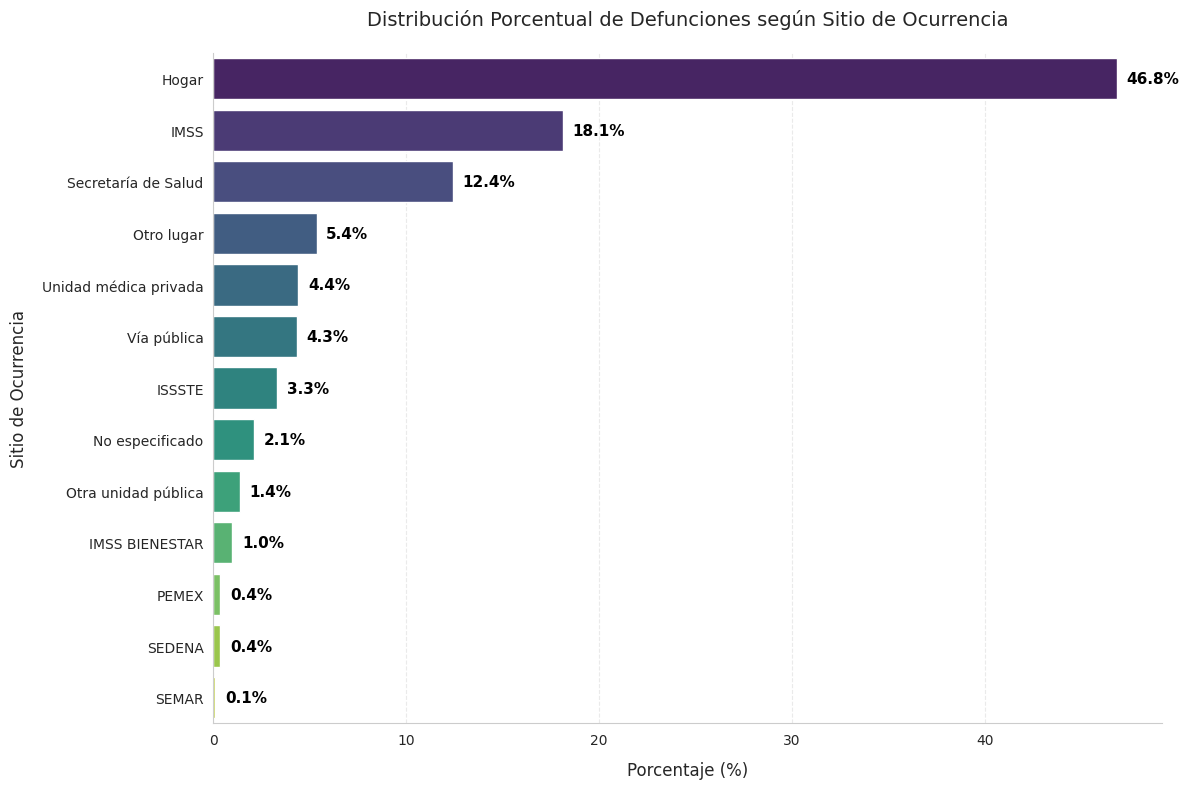

In [ ]:
## EJERCICIO PRACTICO
# Distribuci√≥n Porcentual de Defunciones seg√∫n Sitio de Ocurrencia

# Diccionario con los valores y etiquetas del sitio de ocurrencia
sitio_ocurrencia_dict = {
    1: "Secretar√≠a de Salud", 2: "IMSS BIENESTAR", 3: "IMSS", 4: "ISSSTE",
    5: "PEMEX", 6: "SEDENA", 7: "SEMAR", 8: "Otra unidad p√∫blica",
    9: "Unidad m√©dica privada", 10: "V√≠a p√∫blica", 11: "Hogar",
    12: "Otro lugar", 99: "No especificado"
}

mortalidad["Sitio_ocur_label"] = mortalidad["sitio_ocur"].map(sitio_ocurrencia_dict)
# Distribuci√≥n porcentual
porcentaje = (mortalidad["Sitio_ocur_label"].value_counts(normalize=True) * 100).sort_values(ascending=False)


sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Crear el gr√°fico de barras corregido
sns.barplot(
    x=porcentaje.values,
    y=porcentaje.index,
    hue=porcentaje.index,
    palette="viridis",
    dodge=False,
    legend=False
)

# Etiquetas
plt.xlabel("Porcentaje (%)", fontsize=12, labelpad=10)
plt.ylabel("Sitio de Ocurrencia", fontsize=12, labelpad=10)
plt.title("Distribuci√≥n Porcentual de Defunciones seg√∫n Sitio de Ocurrencia",
          fontsize=14, pad=20)

for index, value in enumerate(porcentaje.values):
    plt.text(
        value + 0.5,
        index,
        f"{value:.1f}%",
        va="center",
        fontsize=11,
        fontweight="bold",
        color="black"
    )


sns.despine()
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Ajustar m√°rgenes
plt.tight_layout()
plt.show()

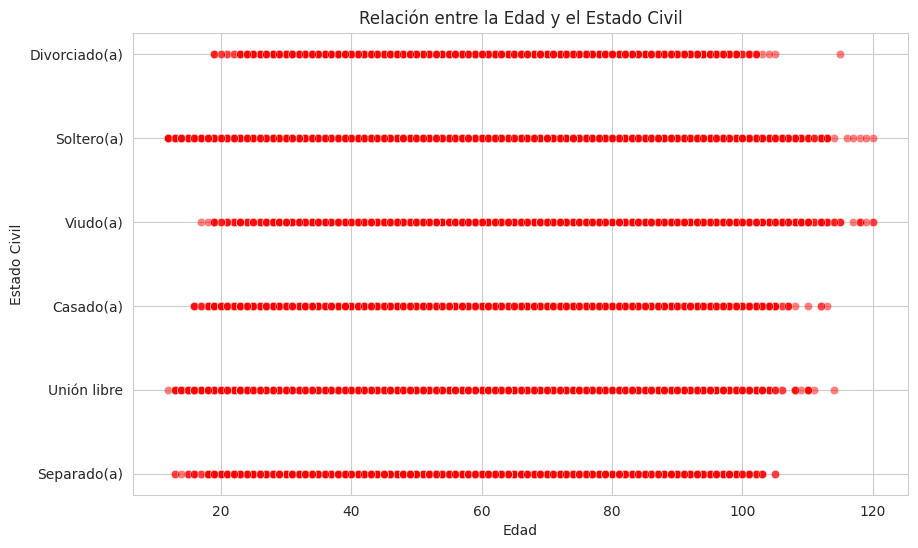

In [ ]:
# An√°lisis bivariado: Edad vs. causa_def
# Diccionario de estado civil
edo_civil_dict = {1: "Soltero(a)", 2: "Divorciado(a)", 3: "Viudo(a)",
    4: "Uni√≥n libre", 5: "Casado(a)", 6: "Separado(a)"}

# Filtrar solo los valores 1 a 6 en edo_civil
mortalidad_filtrada = mortalidad[mortalidad["edo_civil"].isin(edo_civil_dict.keys())].copy()

mortalidad_filtrada["edo_civil_label"] = mortalidad_filtrada["edo_civil"].map(edo_civil_dict)

# Gr√°fico de dispersi√≥n entre edad y estado civil (solo valores 1-6)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad_transformada', y='edo_civil_label', data=mortalidad_filtrada, color='red', alpha=0.5)

# Etiquetas
plt.title('Relaci√≥n entre la Edad y el Estado Civil')
plt.xlabel('Edad')
plt.ylabel('Estado Civil')

plt.show()

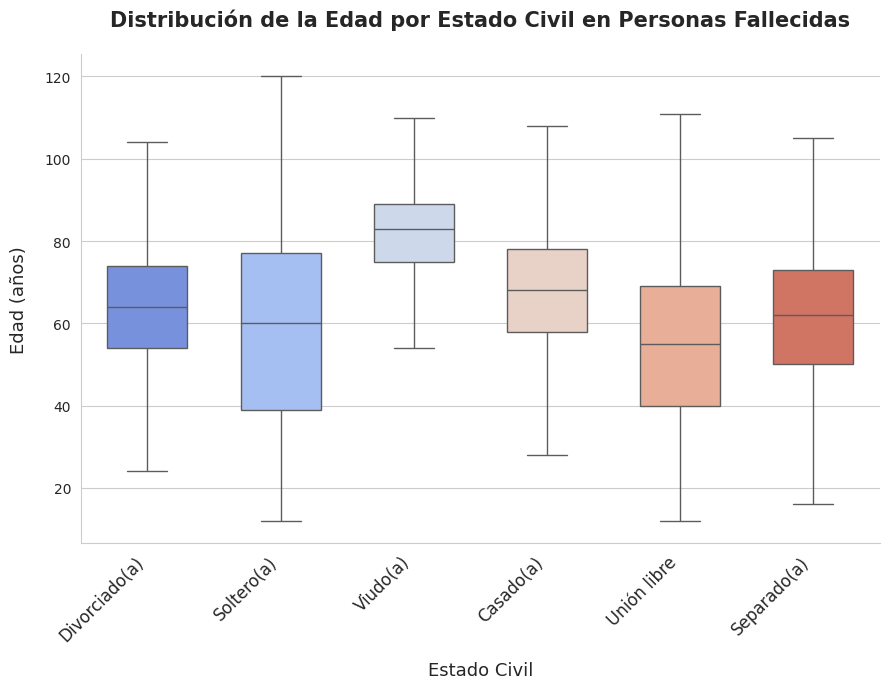

In [ ]:
# Estilo del gr√°fico
sns.set_style("whitegrid")
plt.figure(figsize=(9, 7))  # Aument√© ligeramente la altura

# Diccionario de estado civil
edo_civil_dict = {1: "Soltero(a)", 2: "Divorciado(a)", 3: "Viudo(a)",
    4: "Uni√≥n libre", 5: "Casado(a)", 6: "Separado(a)"}

# Filtrar solo los valores 1 a 6 en edo_civil and add the 'edo_civil_label' column
mortalidad_filtrada = mortalidad[mortalidad["edo_civil"].isin(edo_civil_dict.keys())].copy()
mortalidad_filtrada["edo_civil_label"] = mortalidad_filtrada["edo_civil"].map(edo_civil_dict)

# Crear el boxplot corregido
sns.boxplot(
    x="edo_civil_label",
    y="edad_transformada",
    data=mortalidad_filtrada,
    hue="edo_civil_label",
    palette="coolwarm",
    showfliers=False,
    width=0.6,
    dodge=False,
    legend=False
)

# Etiquetas
plt.title(
    "Distribuci√≥n de la Edad por Estado Civil en Personas Fallecidas",
    fontsize=15,
    fontweight="bold",
    pad=20
)
plt.xlabel("Estado Civil", fontsize=13, labelpad=12)
plt.ylabel("Edad (a√±os)", fontsize=13, labelpad=12)
plt.xticks(
    rotation=45,
    ha="right",
    fontsize=12
)

sns.despine()
plt.tight_layout()
plt.show()

La correlaci√≥n entre la edad y el estado civil es de: 0.12


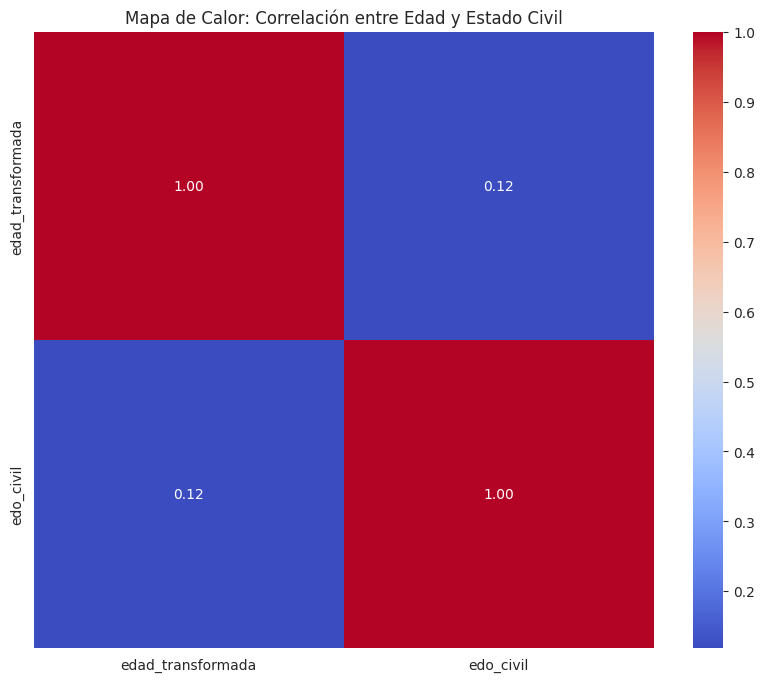

In [ ]:
# Calcular la correlaci√≥n entre edad y estado civil
correlation_value = mortalidad_filtrada['edad_transformada'].corr(mortalidad_filtrada['edo_civil'])
print(f"La correlaci√≥n entre la edad y el estado civil es de: {correlation_value:.2f}")

# Mapa de calor de la correlaci√≥n entre edad y estado civil
plt.figure(figsize=(10, 8))
sns.heatmap(mortalidad_filtrada[['edad_transformada', 'edo_civil']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor: Correlaci√≥n entre Edad y Estado Civil')
plt.show()

## An√°lisis Multivariado

Matriz de Correlaci√≥n (Cramer's V):
            edo_civil  tipo_defun  lugar_ocur  mun_regis  tloc_regis  \
edo_civil    1.000000    0.106825    0.087943   0.130733    0.050219   
tipo_defun   0.106825    1.000000    0.499428   0.164830    0.096534   
lugar_ocur   0.087943    0.499428    1.000000   0.115545    0.065930   
mun_regis    0.130733    0.164830    0.115545   1.000000    0.548253   
tloc_regis   0.050219    0.096534    0.065930   0.548253    1.000000   
loc_regis    0.067674    0.129866    0.086460   0.121005    0.270581   
ent_resid    0.202728    0.114935    0.075227   0.494291    0.294286   
mun_resid    0.152106    0.099582    0.066132   0.738655    0.386905   
tloc_resid   0.115812    0.090171    0.059954   0.320213    0.513051   
loc_resid    0.120186    0.087505    0.061482   0.048001    0.154987   
ent_ocurr    0.166532    0.092465    0.059029   0.531803    0.313476   

            loc_regis  ent_resid  mun_resid  tloc_resid  loc_resid  ent_ocurr  
edo_civil    0.067

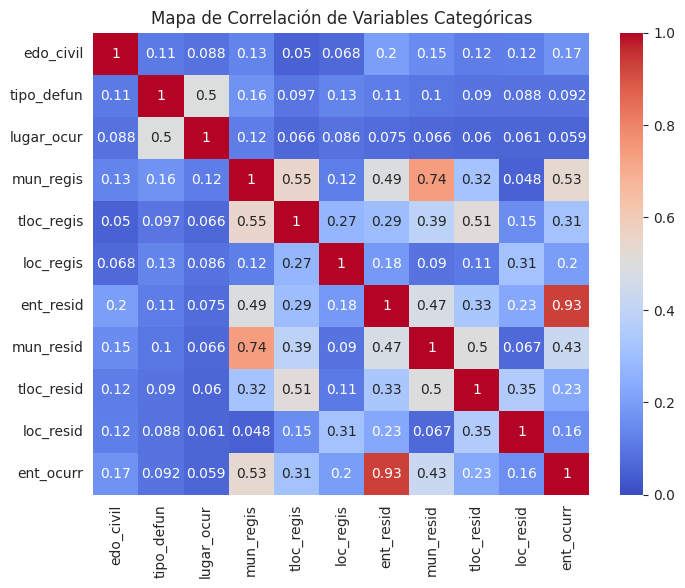

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Funci√≥n para calcular el Coeficiente de Correlaci√≥n de Cramer's V
def cramers_v(x, y):
    # Crear una tabla de contingencia
    confusion_matrix = pd.crosstab(x, y)

    # Calcular el estad√≠stico chi-cuadrado
    chi2 = chi2_contingency(confusion_matrix)[0]

    # Calcular el tama√±o total de la muestra
    n = confusion_matrix.sum().sum()

    # Calcular phi2 (correlaci√≥n basada en chi-cuadrado)
    phi2 = chi2 / n

    # Calcular el n√∫mero de filas y columnas
    r, k = confusion_matrix.shape

    # Ajustar phi2 para Cramer's V
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    # Calcular Cramer's V
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Seleccionar las columnas de inter√©s (Aqui fue a criterio propio)
columnas_interes = ['edo_civil', 'tipo_defun', 'lugar_ocur',"mun_regis",	"tloc_regis",	"loc_regis",	"ent_resid",	"mun_resid"	,"tloc_resid",	"loc_resid",	"ent_ocurr"]
df = mortalidad[columnas_interes]

# Crear una matriz de correlaci√≥n vac√≠a
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calcular Cramer's V para cada par de variables
for col1 in df.columns:
    for col2 in df.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convertir la matriz a valores num√©ricos
corr_matrix = corr_matrix.astype(float)

# Mostrar la matriz de correlaci√≥n
print("Matriz de Correlaci√≥n (Cramer's V):")
print(corr_matrix)

# Creacion de un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Mapa de Correlaci√≥n de Variables Categ√≥ricas")
plt.show()

##  An√°lisis de Componentes Principales (PCA) (Opcional)
El PCA es √∫til para reducir la dimensionalidad de los datos, especialmente cuando tienes muchas variables correlacionadas. Esto te permitir√° visualizar y analizar los datos en un espacio de menor dimensi√≥n.

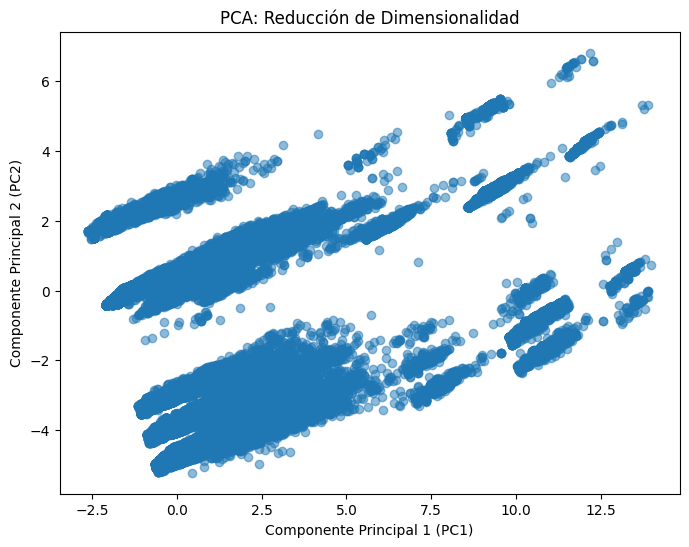

Varianza explicada por cada componente: [0.26983029 0.19719666]


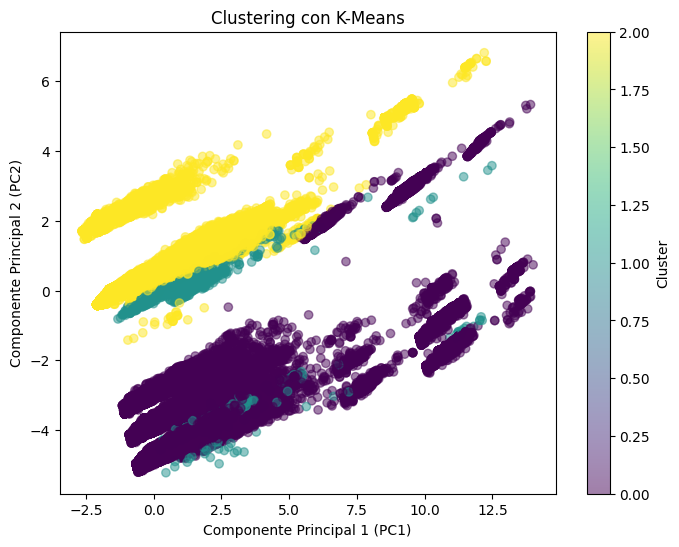

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Seleccionamos las columnas de inter√©s
columnas_interes = ['edo_civil', 'tipo_defun', 'lugar_ocur', 'mun_regis',
                    'loc_regis', 'ent_resid', 'mun_resid', 'loc_resid', 'ent_ocurr']
df = mortalidad[columnas_interes]

# Escalar los datos (PCA y clustering requieren datos estandarizados)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # Aqu√≠ se define df_scaled

# --- An√°lisis de Componentes Principales (PCA) ---
# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
pca_result = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title("PCA: Reducci√≥n de Dimensionalidad")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.show()

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

#  Clustering con K-Means
# Aplicar K-Means a los datos escalados
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el n√∫mero de clusters
df_pca['Cluster'] = kmeans.fit_predict(df_scaled)  # Usar df_scaled para clustering

# Visualizar los clusters en el espacio de PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
plt.title("Clustering con K-Means")
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.colorbar(label='Cluster')
plt.show()

#  Clustering Jer√°rquico
# Calcular la matriz de enlace
Z = linkage(df_scaled, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title("Dendrograma: Clustering Jer√°rquico")
plt.xlabel("√çndice de la Muestra")
plt.ylabel("Distancia")
plt.show()

* PCA reduce las variables originales a un n√∫mero menor de componentes principales

* StandardScaler estandariza los datos para que tengan media 0 y desviaci√≥n est√°ndar 1, lo cual es necesario para PCA.

* pca.explained_variance_ratio_ te dice cu√°nta varianza de los datos originales es capturada por cada componente principal.

El clustering es √∫til para identificar grupos naturales en los datos. Usando algoritmos como K-Means o Agrupamiento Jer√°rquico.

* K-Means agrupa los datos en un n√∫mero espec√≠fico de clusters (en este caso,3).

* Los resultados del clustering se visualizan en el espacio de PCA para interpretar los grupos.

#  Modelo de Regresi√≥n Polinomica para el An√°lisis de las Tendencias y Causas de la Mortalidad en M√©xico del 2023

### ¬øPor qu√© usamos diferentes grados en la regresi√≥n polin√≥mica?

La regresi√≥n polin√≥mica nos permite modelar relaciones no lineales entre la edad y el n√∫mero de defunciones. El **grado del polinomio** define la flexibilidad del modelo:

| Grado del polinomio | Qu√© captura | Riesgo |
|--------------------|-------------|--------|
| **Grado 2 (cuadr√°tico)** | Patr√≥n en forma de U o arco (una sola curvatura) | Puede ser demasiado simple y no seguir bien los datos si el patr√≥n es m√°s complejo. |
| **Grado 3 (c√∫bico)** | Permite hasta dos puntos de inflexi√≥n (cambio de curvatura) | Ajusta mejor, pero podr√≠a empezar a seguir el ruido. |
| **Grado 4 (cu√°rtico)** | Permite formas m√°s onduladas y complejas | Mayor riesgo de sobreajuste: el modelo se adapta demasiado a las fluctuaciones y pierde capacidad de generalizaci√≥n. |

**¬øPor qu√© probar varios grados?**

- Para encontrar un equilibrio entre simplicidad y buen ajuste a los datos.
- Porque la mortalidad suele tener un patr√≥n complejo: alta en edades muy tempranas y avanzadas, y baja en edades intermedias.
- Para evaluar el modelo con m√©tricas como R¬≤ y validaci√≥n cruzada, y no solo por la apariencia del gr√°fico.

Probar distintos grados nos ayuda a elegir el modelo que mejor describe la realidad sin sobreajustarse.



--- Polinomio grado 2 ---
R¬≤: 0.676
MSE: 9475303.786
MSE validaci√≥n cruzada: 137740288.146
Shapiro-Wilk residuos: stat=0.934, p-valor=0.000


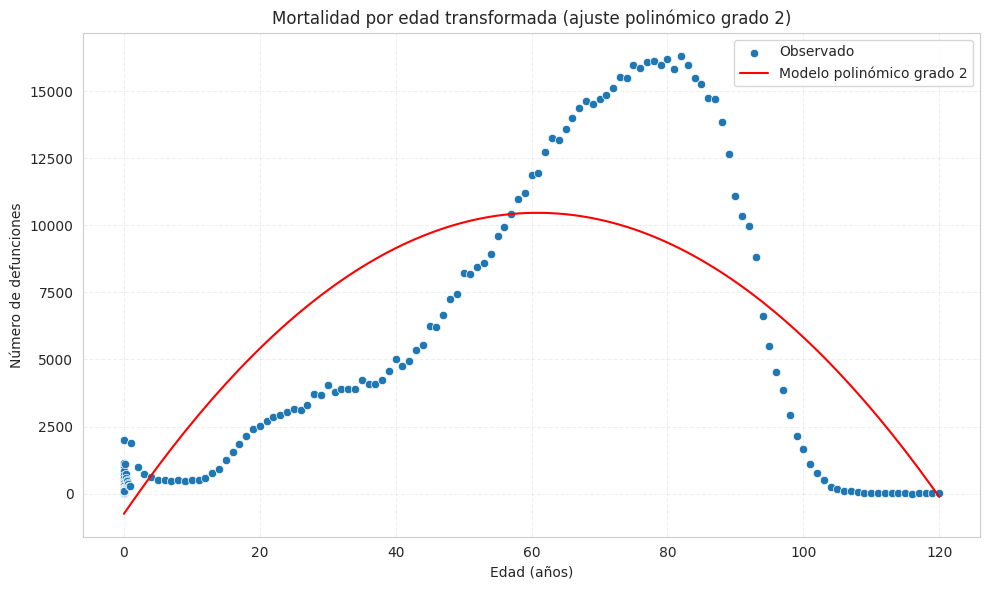


--- Polinomio grado 3 ---
R¬≤: 0.850
MSE: 4401267.258
MSE validaci√≥n cruzada: 64736952.048
Shapiro-Wilk residuos: stat=0.913, p-valor=0.000


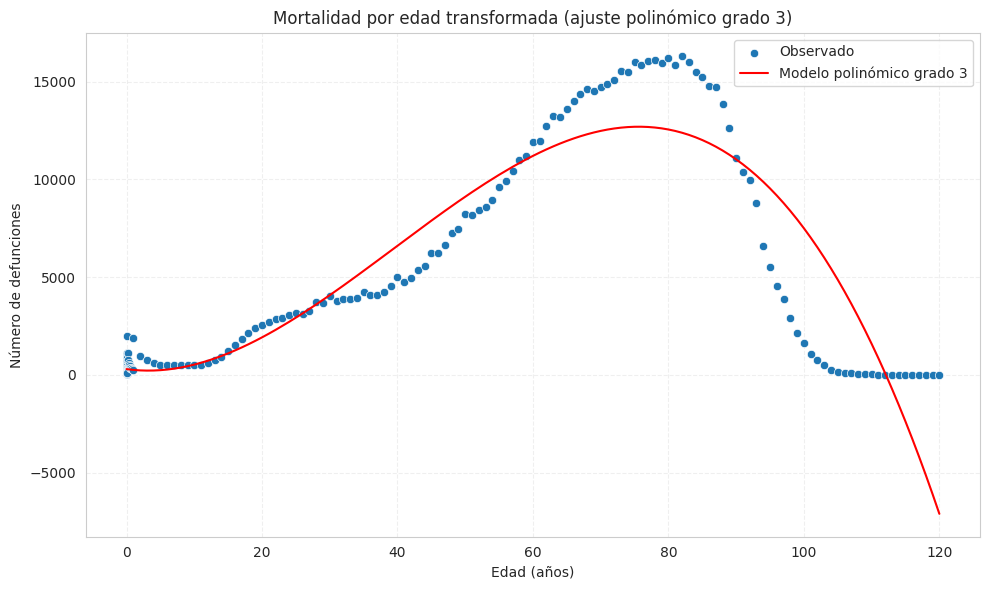


--- Polinomio grado 4 ---
R¬≤: 0.875
MSE: 3646296.945
MSE validaci√≥n cruzada: 40330992.688
Shapiro-Wilk residuos: stat=0.977, p-valor=0.004


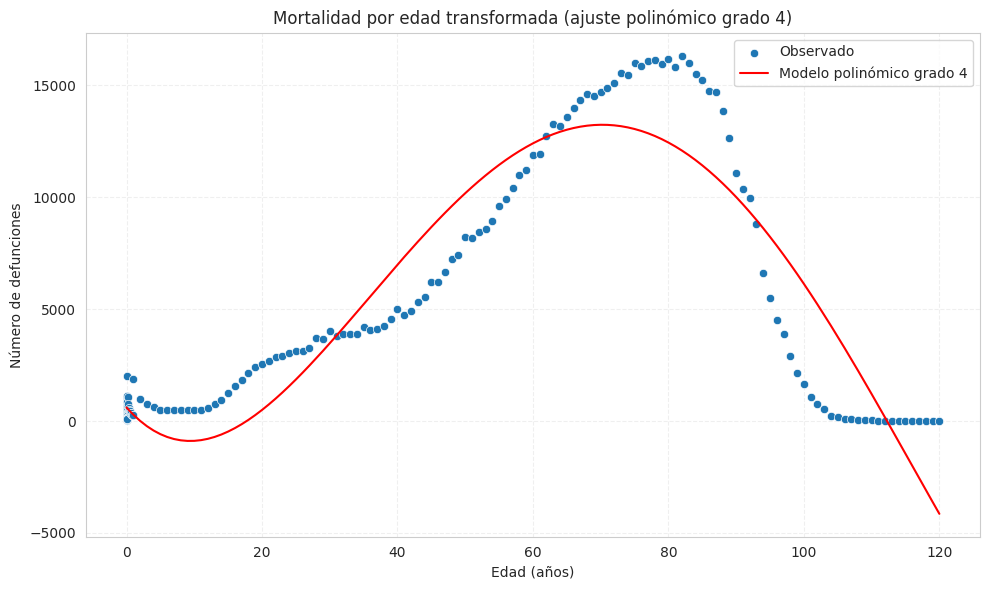

In [ ]:
#############  USANDO EDAD EN A√ëOS   ################
def convertir_a_anios(valor):
    if 1001 <= valor <= 1023:  # Horas
        return (valor - 1000) / 8760
    elif 2001 <= valor <= 2029:  # D√≠as
        return (valor - 2000) / 365
    elif 3001 <= valor <= 3011:  # Meses
        return (valor - 3000) / 12
    elif 4001 <= valor <= 4120:  # A√±os
        return valor - 4000
    else:
        return np.nan

mortalidad['edad_transformada'] = mortalidad['edad'].apply(convertir_a_anios)

# Eliminamos registros sin edad v√°lida
mortalidad_valid = mortalidad[(~mortalidad['edad_transformada'].isna()) & (mortalidad['anio_ocur'] == 2023)]

# Agrupamos los datos
df_simple = (
    mortalidad_valid
    .groupby('edad_transformada')
    .size()
    .reset_index(name='defunciones')
    .sort_values('edad_transformada')
)

def ajustar_y_graficar(df, grado):
    X = df[['edad_transformada']]
    y = df['defunciones']

    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    # Validaci√≥n
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mse_cv = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()
    residuos = y - y_pred
    stat, p_shapiro = shapiro(residuos)

    # M√©tricas
    print(f"\n--- Polinomio grado {grado} ---")
    print(f"R¬≤: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"MSE validaci√≥n cruzada: {mse_cv:.3f}")
    print(f"Shapiro-Wilk residuos: stat={stat:.3f}, p-valor={p_shapiro:.3f}")


    plt.figure(figsize=(10,6))
    sns.scatterplot(x='edad_transformada', y='defunciones', data=df, label='Observado')
    sns.lineplot(x=df['edad_transformada'], y=y_pred, color='red', label=f'Modelo polin√≥mico grado {grado}')
    plt.title(f'Mortalidad por edad transformada (ajuste polin√≥mico grado {grado})')
    plt.xlabel('Edad (a√±os)')
    plt.ylabel('N√∫mero de defunciones')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# MODELOS
for grado in [2, 3, 4]:
    ajustar_y_graficar(df_simple, grado)



--- Polinomio grado 2 ---
R¬≤: 0.483
MSE: 397572424.004
MSE validaci√≥n cruzada: 2686775679.984
Shapiro-Wilk residuos: stat=0.877, p-valor=0.002


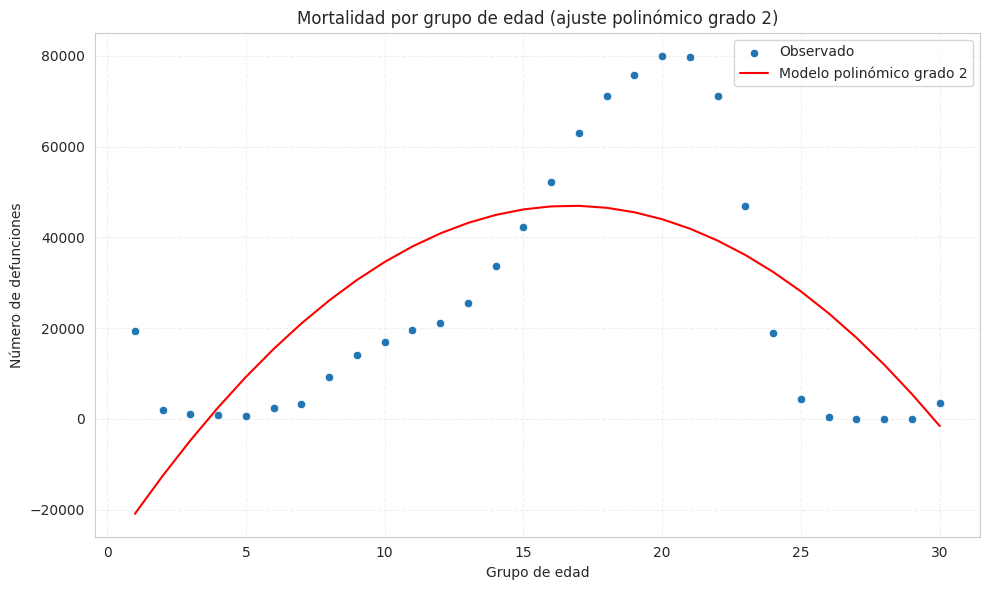


--- Polinomio grado 3 ---
R¬≤: 0.700
MSE: 230764260.217
MSE validaci√≥n cruzada: 1897566222.410
Shapiro-Wilk residuos: stat=0.948, p-valor=0.146


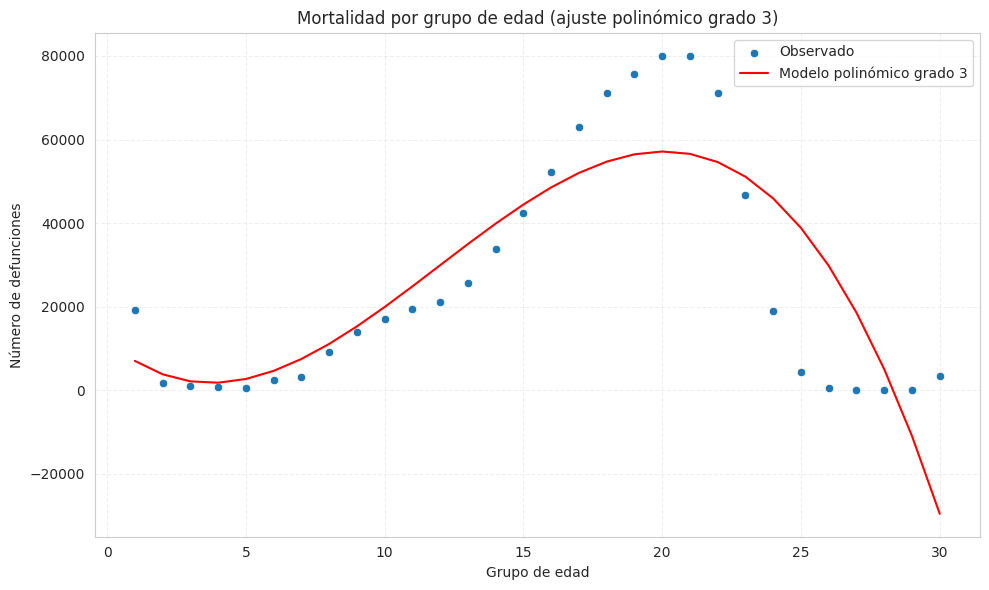


--- Polinomio grado 4 ---
R¬≤: 0.799
MSE: 154554713.741
MSE validaci√≥n cruzada: 18368968726.016
Shapiro-Wilk residuos: stat=0.976, p-valor=0.698


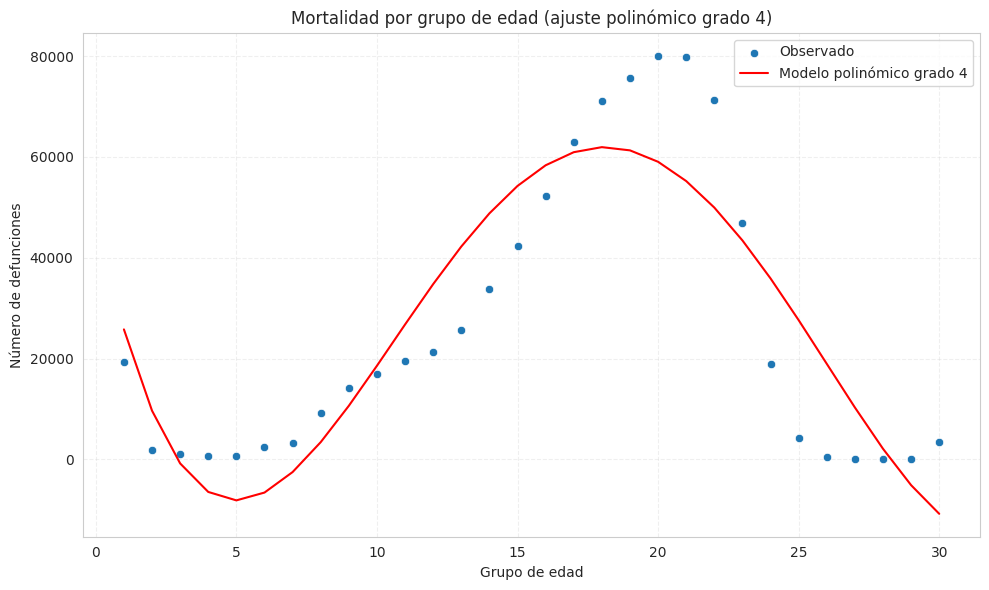

In [ ]:
#############  USANDO EDAD_AGRU (opcional)   ################


# Contar defunciones totales por grupo de edad
df_simple = (
    mortalidad[mortalidad['anio_ocur'] == 2023]
    .groupby('edad_agru')
    .size()
    .reset_index(name='defunciones')
    .sort_values('edad_agru')
)

def ajustar_y_graficar(df, grado):
    X = df[['edad_agru']]
    y = df['defunciones']

    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    # Validaci√≥n
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mse_cv = -cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error').mean()
    residuos = y - y_pred
    stat, p_shapiro = shapiro(residuos)

    # M√©tricas
    print(f"\n--- Polinomio grado {grado} ---")
    print(f"R¬≤: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"MSE validaci√≥n cruzada: {mse_cv:.3f}")
    print(f"Shapiro-Wilk residuos: stat={stat:.3f}, p-valor={p_shapiro:.3f}")

    # Graficar
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='edad_agru', y='defunciones', data=df, label='Observado')
    sns.lineplot(x=df['edad_agru'], y=y_pred, color='red', label=f'Modelo polin√≥mico grado {grado}')
    plt.title(f'Mortalidad por grupo de edad (ajuste polin√≥mico grado {grado})')
    plt.xlabel('Grupo de edad')
    plt.ylabel('N√∫mero de defunciones')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

#  MODELOS
for grado in [2, 3, 4]:
    ajustar_y_graficar(df_simple, grado)
